## Coauthorship Network
### Using Scopus data and the nxviz python library

In [ ]:
%pip install nxviz

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nxviz import circos

In [ ]:
data = pd.read_csv('scopus.csv')

graph = nx.Graph()

for index, row in data.iterrows():
    authors = row['Authors'].split(';')
    authors = [author.strip() for author in authors]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            graph.add_edge(authors[i], authors[j])

density = nx.density(graph)

plt.figure(figsize=(10, 8))
circos(graph)
plt.show()

print(f"Graph density: {density}")
print(f"Number of authors: {graph.number_of_nodes()}")

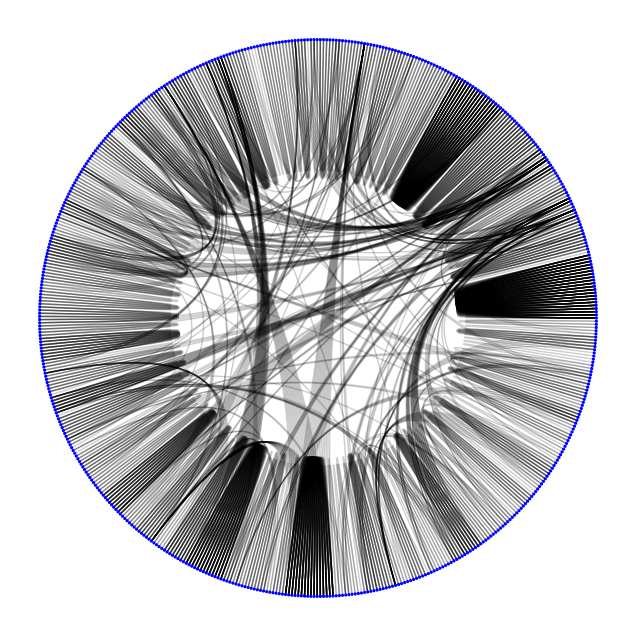

Graph density: 0.012327998680085795

Number of authors: 551

In [ ]:
X = 20

nodes_with_min_neighbors = [node for node in graph.nodes() if graph.degree(node) >= X]
subgraph = graph.subgraph(nodes_with_min_neighbors)

subgraph_density = nx.density(subgraph)

plt.figure(figsize=(10, 8))
circos(subgraph)
plt.show()

print(f"Subgraph density: {subgraph_density}")
print(f"Number of authors: {subgraph.number_of_nodes()}")

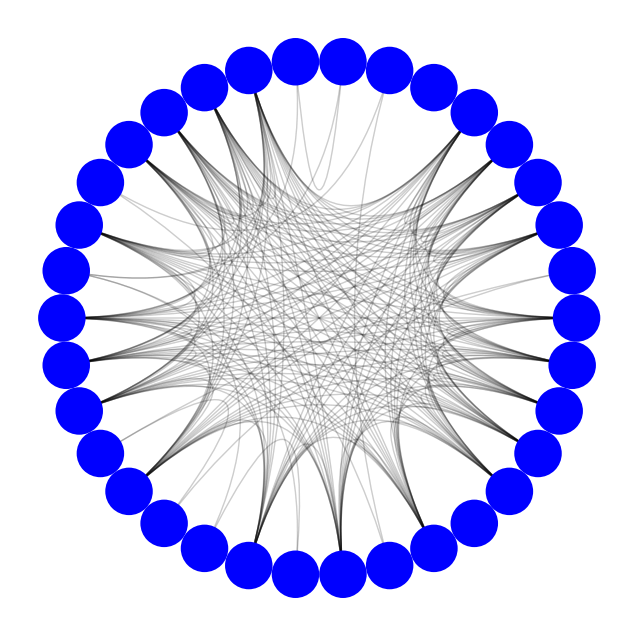

**Subgraph only with nodes that have at least 20 neighbors**

Subgraph density: 0.39572192513368987

Number of authors: 34

In [ ]:
degrees = [graph.degree(node) for node in graph.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black', alpha=0.7)
plt.title("Histogram of Vertex Degree Distribution")
plt.xlabel("Degree (Number of Co-authors)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


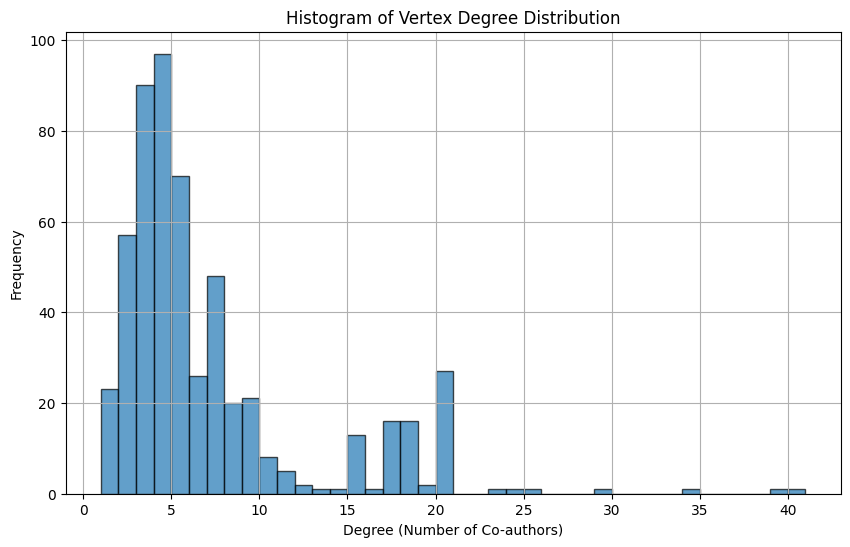